## Asessing Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/#KaburAjaDulu/data_ulasan.csv")
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1881534778828378600,Tue Jan 21 02:50:23 +0000 2025,6,Udah ngerasain #KaburAjaDulu trus balik bentar...,1881534778828378600,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/188153477882837...,3711470718,NaN
1,1881660555511107788,Tue Jan 21 11:10:11 +0000 2025,3,https://t.co/mC0g1FJSgk Sambil grinding buat p...,1881660560116494514,NaN,primawansatrio,in,NaN,0,0,1,https://x.com/undefined/status/188166056011649...,104823513,NaN
2,1881654417021419948,Tue Jan 21 10:45:47 +0000 2025,1,Apakah di sini ada yang butuh info apply visa ...,1881654417021419948,NaN,NaN,in,NaN,1,1,0,https://x.com/undefined/status/188165441702141...,1281640429104988161,NaN
3,1881493895814766682,Tue Jan 21 02:29:09 +0000 2025,0,@twisterfruity Search hashtag #kaburajadulu,1881529434899202392,NaN,twisterfruity,en,NaN,0,0,0,https://x.com/undefined/status/188152943489920...,1741028043572105216,NaN
4,1881494465925337549,Tue Jan 21 16:46:13 +0000 2025,0,@cattominyg @tanyakanrl biar bisa make hastag ...,1881745123496903044,NaN,minyuwnki,in,NaN,0,0,0,https://x.com/undefined/status/188174512349690...,1770824593789317121,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      4768 non-null   int64  
 1   created_at               4768 non-null   object 
 2   favorite_count           4768 non-null   int64  
 3   full_text                4768 non-null   object 
 4   id_str                   4768 non-null   int64  
 5   image_url                994 non-null    object 
 6   in_reply_to_screen_name  925 non-null    object 
 7   lang                     4768 non-null   object 
 8   location                 0 non-null      float64
 9   quote_count              4768 non-null   int64  
 10  reply_count              4768 non-null   int64  
 11  retweet_count            4768 non-null   int64  
 12  tweet_url                4768 non-null   object 
 13  user_id_str              4768 non-null   int64  
 14  username                

In [6]:
df.isnull().sum()

,0
conversation_id_str,0
created_at,0
favorite_count,0
full_text,0
id_str,0
image_url,3774
in_reply_to_screen_name,3843
lang,0
location,4768
quote_count,0


In [7]:
print("Jumlah Duplikasi", df.duplicated().sum())

Jumlah Duplikasi 0


# Preprocessing Data

## Cleaning Data & Case Folding (Ubah Huruf Jadi Kecil)

In [8]:
# Menghapus semua kolom kecuali 'full_text'
df = df[['full_text']].copy()

In [9]:
!pip install emoji
import re
import emoji

def clean_text(text):
    # Hapus URL
    text = re.sub(r"http\S+|www\S+", "", text)

    # Hapus mention (@username)
    text = re.sub(r"@\w+", "", text)

    # Hapus hashtag (#topik) tanpa menghapus kata setelahnya
    text = re.sub(r"#(\w+)", r"\1", text)

    # Hapus emotikon
    text = emoji.replace_emoji(text, replace="")

    # Hapus simbol, angka, dan karakter aneh kecuali huruf & spasi
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Hapus spasi berlebih
    text = re.sub(r"\s+", " ", text).strip()

    return text

df["clean_text"] = df["full_text"].apply(clean_text)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 29.8 MB/s eta 0:00:00


In [10]:
from tabulate import tabulate

# Ambil 5 contoh data pertama
sample_data = df[["full_text", "clean_text"]].head(5)

# Loop untuk menampilkan setiap tweet secara vertikal
for i, row in sample_data.iterrows():
    print(f"Tweet {i+1}:")
    print(tabulate(row.to_frame(), tablefmt="fancy_grid"))
    print("\n" + "="*50 + "\n")  # Pemisah antar tweet

Tweet 1:
╒════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ full_text  │ Udah ngerasain #KaburAjaDulu trus balik bentar 50% nyesel 50% nya bersyukur gw lagi di indo pada saat bapak sedang sekarat dan berujung wafat. Seenggaknya perjalanan dari Jakarta ga selama kalo gw nyangkut di imigrasi for whatever weird coincidences. Tantangannya adalah │
├────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ clean_text │ Udah ngerasain KaburAjaDulu trus balik bentar nyesel nya bersyukur gw lagi di indo pada saat bapak sedang sekara

##Case Folding

In [11]:
# Mengubah teks menjadi lowercase
df['clean_text'] = df['clean_text'].str.lower()
df

,full_text,clean_text
0,Udah ngerasain #KaburAjaDulu trus balik bentar...,udah ngerasain kaburajadulu trus balik bentar ...
1,https://t.co/mC0g1FJSgk Sambil grinding buat p...,sambil grinding buat persiapan kaburajadulu al...
2,Apakah di sini ada yang butuh info apply visa ...,apakah di sini ada yang butuh info apply visa ...
3,@twisterfruity Search hashtag #kaburajadulu,search hashtag kaburajadulu
4,@cattominyg @tanyakanrl biar bisa make hastag ...,biar bisa make hastag kaburajadulu
...,...,...
4763,Mulai fomo sama #KaburAjaDulu nih wkwk,mulai fomo sama kaburajadulu nih wkwk
4764,Bismillah #KaburAjaDulu ke Jepang Kalo betah l...,bismillah kaburajadulu ke jepang kalo betah la...
4765,Warteg di Jakarta Pun Jadi Korban Pungli Ormas...,warteg di jakarta pun jadi korban pungli ormas...
4766,Udah ga bisa #kaburajadulu,udah ga bisa kaburajadulu


In [12]:
print("Jumlah Duplikasi", df.duplicated().sum())

Jumlah Duplikasi 165


In [13]:
# Menghapus duplikat berdasarkan kolom 'full_text'
df = df.drop_duplicates(subset=['full_text'], keep='first')

# Menampilkan jumlah data setelah penghapusan duplikat
print(f"Jumlah data setelah menghapus duplikat: {len(df)}")

Jumlah data setelah menghapus duplikat: 4603


## Tokenization

In [14]:
!python -m spacy download xx_ent_wiki_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 67.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
import spacy

# Load model bahasa Indonesia
nlp = spacy.blank("id")

# Fungsi tokenization dengan spaCy
def tokenize_spacy(text):
    doc = nlp(text)
    return [token.text for token in doc]

df['tokens'] = df['clean_text'].apply(tokenize_spacy)

/tmp/ipython-input-3310474516.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['clean_text'].apply(tokenize_spacy)


In [16]:
from tabulate import tabulate

# Ambil 5 data pertama untuk clean_text dan token_text
clean_text_data = df[["clean_text"]].head()
token_text_data = df[["tokens"]].head()

# Konversi ke format tabulate
print("📌 **Clean Text (Sebelum Preprocessing)**")
print(tabulate(clean_text_data, headers="keys", tablefmt="fancy_grid", showindex=True))

print("\n📌 **Token Text (Setelah Preprocessing)**")
print(tabulate(token_text_data, headers="keys", tablefmt="fancy_grid", showindex=True))

📌 **Clean Text (Sebelum Preprocessing)**
╒════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│    │ clean_text                                                                                                                                                                                                                                                          │
╞════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│  0 │ udah ngerasain kaburajadulu trus balik bentar nyesel nya bersyukur gw lagi di indo pada saat bapak sedang sekarat dan berujung wafat seenggaknya 

In [17]:
df.head()

,full_text,clean_text,tokens
0,Udah ngerasain #KaburAjaDulu trus balik bentar...,udah ngerasain kaburajadulu trus balik bentar ...,"[udah, ngerasain, kaburajadulu, trus, balik, b..."
1,https://t.co/mC0g1FJSgk Sambil grinding buat p...,sambil grinding buat persiapan kaburajadulu al...,"[sambil, grinding, buat, persiapan, kaburajadu..."
2,Apakah di sini ada yang butuh info apply visa ...,apakah di sini ada yang butuh info apply visa ...,"[apakah, di, sini, ada, yang, butuh, info, app..."
3,@twisterfruity Search hashtag #kaburajadulu,search hashtag kaburajadulu,"[search, hashtag, kaburajadulu]"
4,@cattominyg @tanyakanrl biar bisa make hastag ...,biar bisa make hastag kaburajadulu,"[biar, bisa, make, hastag, kaburajadulu]"


## Stopword

In [18]:
!pip install PySastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 13.0 MB/s eta 0:00:00


In [19]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Inisialisasi stopword dari Sastrawi
stopword_factory = StopWordRemoverFactory()
sastrawi_stopwords = set(stopword_factory.get_stop_words())

# Tambahkan daftar kata tidak bermakna tambahan (custom)
extend_stopwords = {
    'aja', 'banget', 'nih', 'loh', 'dong', 'pun', 'ya', 'emang','lo','gila','we','ah','alas','moga','tuju','pikir','my','you','ajar','ku','guys'
    'kayak', 'gitu', 'nya', 'deh', 'toh', 'doang', 'sih', 'kan', 'lagi', 'alas', 'ala', 'gua','real','iti','eh','moga','EH','Eh','gtgt','no'
    'nih', 'tau', 'yuk', 'wkwk', 'haha', 'lol', 'anjing', 'tolol', 'mah', 'amp', 'anjir', 'bangsat', 'tuh', 'kak','iya', 'carmen', 'pengin' , 'kabur'
    'malah', 'padahal', 'masih', 'udah', 'udah', 'udah', 'biar', 'ntar', 'cuma','gua','dong', 'kan', 'aja', 'deh', 'nih', 'loh', 'ya', 'si', 'lah', 'kok', 'sih',
    'dong', 'makanya', 'padahal', 'walaupun', 'gitu', 'gini', 'gue', 'elo', 'gw', 'guy',' result shio', 'alas', 'ala', 'gua', 'kabur ajadulu','gak'
    'nih', 'tau', 'yuk', 'wkwk', 'haha', 'lol', 'anjing', 'tolol', 'mah', 'amp', 'anjir', 'bangsat', 'tuh', 'kak','iya', 'carmen', 'pengin' , 'kabur'
    'dulu', 'udah', 'selalu', 'tuh', 'lah', 'terus', 'jadi', 'apalagi','gw','gak','tuh','nih','amp','jp','pas','coba','lu','wkwkwk', 'ga', 'kalo'
}

# Gabungkan stopword Sastrawi dan custom
combined_stopwords = sastrawi_stopwords.union(extend_stopwords)

# Fungsi hapus stopword (kata tidak penting)
def remove_meaningless_words(tokens):
    return [word for word in tokens if word not in combined_stopwords]

# Terapkan ke data
df['stopword'] = df['tokens'].apply(remove_meaningless_words)

/tmp/ipython-input-4290037936.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stopword'] = df['tokens'].apply(remove_meaningless_words)


In [20]:
df.head()

,full_text,clean_text,tokens,stopword
0,Udah ngerasain #KaburAjaDulu trus balik bentar...,udah ngerasain kaburajadulu trus balik bentar ...,"[udah, ngerasain, kaburajadulu, trus, balik, b...","[ngerasain, kaburajadulu, trus, bentar, nyesel..."
1,https://t.co/mC0g1FJSgk Sambil grinding buat p...,sambil grinding buat persiapan kaburajadulu al...,"[sambil, grinding, buat, persiapan, kaburajadu...","[grinding, persiapan, kaburajadulu, all, the, ..."
2,Apakah di sini ada yang butuh info apply visa ...,apakah di sini ada yang butuh info apply visa ...,"[apakah, di, sini, ada, yang, butuh, info, app...","[butuh, info, apply, visa, kaburajadulu, kanad..."
3,@twisterfruity Search hashtag #kaburajadulu,search hashtag kaburajadulu,"[search, hashtag, kaburajadulu]","[search, hashtag, kaburajadulu]"
4,@cattominyg @tanyakanrl biar bisa make hastag ...,biar bisa make hastag kaburajadulu,"[biar, bisa, make, hastag, kaburajadulu]","[make, hastag, kaburajadulu]"


## Remove Slang

In [21]:
#menghapus kata-kata gaul
indo_slang_word = pd.read_csv("https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv")

In [22]:
import pandas as pd

# Unduh kamus kata-kata slang/alay dari GitHub
indo_slang_word = pd.read_csv("https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv")

# Ambil kolom kata slang-nya (asumsinya kolom pertama adalah kata gaul)
slang_words = set(indo_slang_word['slang'].str.lower().tolist())

def clean_slang_and_useless(tokens):
    return [word for word in tokens if word.lower() not in slang_words]

# Terapkan ke DataFrame
df["remove_slang"] = df["stopword"].apply(clean_slang_and_useless)

/tmp/ipython-input-3947094374.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["remove_slang"] = df["stopword"].apply(clean_slang_and_useless)


In [23]:
# Tampilkan hasil 5 data pertama untuk stopword_text dan remove_slang_text
stopword_text_data = df[["stopword"]].head()
remove_slang_text_data = df[["remove_slang"]].head()

# Konversi ke format tabulate
print("📌 **Stopword Text (Sebelum Preprocessing)**")
print(tabulate(stopword_text_data, headers="keys", tablefmt="fancy_grid", showindex=True))

print("\n📌 **Remove Slang Text (Setelah Preprocessing)**")
print(tabulate(remove_slang_text_data, headers="keys", tablefmt="fancy_grid", showindex=True))

📌 **Stopword Text (Sebelum Preprocessing)**
╒════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│    │ stopword                                                                                                                                                                                                                                   │
╞════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│  0 │ ['ngerasain', 'kaburajadulu', 'trus', 'bentar', 'nyesel', 'bersyukur', 'indo', 'sekarat', 'berujung', 'wafat', 'seenggaknya', 'perjalanan', 'jakarta', 'nyangkut', 'imigrasi', 'for', 'whatever', 'weird', 'coincidences'

In [24]:
df.head()

,full_text,clean_text,tokens,stopword,remove_slang
0,Udah ngerasain #KaburAjaDulu trus balik bentar...,udah ngerasain kaburajadulu trus balik bentar ...,"[udah, ngerasain, kaburajadulu, trus, balik, b...","[ngerasain, kaburajadulu, trus, bentar, nyesel...","[kaburajadulu, bentar, bersyukur, sekarat, ber..."
1,https://t.co/mC0g1FJSgk Sambil grinding buat p...,sambil grinding buat persiapan kaburajadulu al...,"[sambil, grinding, buat, persiapan, kaburajadu...","[grinding, persiapan, kaburajadulu, all, the, ...","[grinding, persiapan, kaburajadulu, all, the, ..."
2,Apakah di sini ada yang butuh info apply visa ...,apakah di sini ada yang butuh info apply visa ...,"[apakah, di, sini, ada, yang, butuh, info, app...","[butuh, info, apply, visa, kaburajadulu, kanad...","[butuh, info, apply, visa, kaburajadulu, kanad..."
3,@twisterfruity Search hashtag #kaburajadulu,search hashtag kaburajadulu,"[search, hashtag, kaburajadulu]","[search, hashtag, kaburajadulu]","[search, hashtag, kaburajadulu]"
4,@cattominyg @tanyakanrl biar bisa make hastag ...,biar bisa make hastag kaburajadulu,"[biar, bisa, make, hastag, kaburajadulu]","[make, hastag, kaburajadulu]","[hastag, kaburajadulu]"


## Stemming

In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

# Dictionary untuk menyimpan hasil stemming yang sudah dihitung
stem_cache = {}

# Fungsi stemming (mendapatkan kata utama contoh bermain -> main) dengan caching
def optimized_stemming(tokens):
    return [stem_cache.setdefault(word, stemmer.stem(word)) for word in tokens]

# Terapkan ke dataframe
df['stemming'] = df['remove_slang'].apply(optimized_stemming)

/tmp/ipython-input-1016907155.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemming'] = df['remove_slang'].apply(optimized_stemming)


In [26]:
# Ubah list token hasil stemming menjadi kalimat utuh
df['stemming_sentence'] = df['stemming'].apply(lambda tokens: ' '.join(tokens))


/tmp/ipython-input-325917601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemming_sentence'] = df['stemming'].apply(lambda tokens: ' '.join(tokens))


In [27]:
df.head()

,full_text,clean_text,tokens,stopword,remove_slang,stemming,stemming_sentence
0,Udah ngerasain #KaburAjaDulu trus balik bentar...,udah ngerasain kaburajadulu trus balik bentar ...,"[udah, ngerasain, kaburajadulu, trus, balik, b...","[ngerasain, kaburajadulu, trus, bentar, nyesel...","[kaburajadulu, bentar, bersyukur, sekarat, ber...","[kaburajadulu, bentar, syukur, sekarat, ujung,...",kaburajadulu bentar syukur sekarat ujung wafat...
1,https://t.co/mC0g1FJSgk Sambil grinding buat p...,sambil grinding buat persiapan kaburajadulu al...,"[sambil, grinding, buat, persiapan, kaburajadu...","[grinding, persiapan, kaburajadulu, all, the, ...","[grinding, persiapan, kaburajadulu, all, the, ...","[grinding, siap, kaburajadulu, all, the, best,...",grinding siap kaburajadulu all the best for al...
2,Apakah di sini ada yang butuh info apply visa ...,apakah di sini ada yang butuh info apply visa ...,"[apakah, di, sini, ada, yang, butuh, info, app...","[butuh, info, apply, visa, kaburajadulu, kanad...","[butuh, info, apply, visa, kaburajadulu, kanad...","[butuh, info, apply, visa, kaburajadulu, kanad...",butuh info apply visa kaburajadulu kanada us e...
3,@twisterfruity Search hashtag #kaburajadulu,search hashtag kaburajadulu,"[search, hashtag, kaburajadulu]","[search, hashtag, kaburajadulu]","[search, hashtag, kaburajadulu]","[search, hashtag, kaburajadulu]",search hashtag kaburajadulu
4,@cattominyg @tanyakanrl biar bisa make hastag ...,biar bisa make hastag kaburajadulu,"[biar, bisa, make, hastag, kaburajadulu]","[make, hastag, kaburajadulu]","[hastag, kaburajadulu]","[hastag, kaburajadulu]",hastag kaburajadulu


## Translation

In [28]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.1 MB/s eta 0:00:00


In [29]:
from deep_translator import GoogleTranslator
from tqdm import tqdm
import time

# Pastikan tqdm aktif untuk pandas
tqdm.pandas()

# Fungsi translasi dengan retry
def translate_tokens_to_english(token_list):
    if isinstance(token_list, str):
        import ast
        token_list = ast.literal_eval(token_list)

    # Mask keyword
    masked_tokens = ["__KABURAJADULU__" if token.lower() == "kaburajadulu" else token for token in token_list]
    text = " ".join(masked_tokens)

    try:
        translated = GoogleTranslator(source='auto', target='en').translate(text)
        time.sleep(0.3)

        # Unmask keyword
        translated = translated.replace("__KABURAJADULU__", "kaburajadulu")
        return translated
    except Exception as e:
        print(f"Translation error: {e}")
        return text

# Terapkan dengan progress bar
df["translated_en"] = df["stemming"].progress_apply(translate_tokens_to_english)

100%|██████████| 4603/4603 [33:52<00:00,  2.27it/s]
/tmp/ipython-input-3411826796.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["translated_en"] = df["stemming"].progress_apply(translate_tokens_to_english)


In [30]:
# Mengubah teks menjadi lowercase
df['translated_en'] = df['translated_en'].str.lower()

# Menampilkan hasil
display(df.head())

/tmp/ipython-input-3187537085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['translated_en'] = df['translated_en'].str.lower()


,full_text,clean_text,tokens,stopword,remove_slang,stemming,stemming_sentence,translated_en
0,Udah ngerasain #KaburAjaDulu trus balik bentar...,udah ngerasain kaburajadulu trus balik bentar ...,"[udah, ngerasain, kaburajadulu, trus, balik, b...","[ngerasain, kaburajadulu, trus, bentar, nyesel...","[kaburajadulu, bentar, bersyukur, sekarat, ber...","[kaburajadulu, bentar, syukur, sekarat, ujung,...",kaburajadulu bentar syukur sekarat ujung wafat...,__kaburajadulu__ wait a minute dying the end o...
1,https://t.co/mC0g1FJSgk Sambil grinding buat p...,sambil grinding buat persiapan kaburajadulu al...,"[sambil, grinding, buat, persiapan, kaburajadu...","[grinding, persiapan, kaburajadulu, all, the, ...","[grinding, persiapan, kaburajadulu, all, the, ...","[grinding, siap, kaburajadulu, all, the, best,...",grinding siap kaburajadulu all the best for al...,grinding siap kaburajadulu all the best for al...
2,Apakah di sini ada yang butuh info apply visa ...,apakah di sini ada yang butuh info apply visa ...,"[apakah, di, sini, ada, yang, butuh, info, app...","[butuh, info, apply, visa, kaburajadulu, kanad...","[butuh, info, apply, visa, kaburajadulu, kanad...","[butuh, info, apply, visa, kaburajadulu, kanad...",butuh info apply visa kaburajadulu kanada us e...,need info apply visa __kaburajadulu__ canada u...
3,@twisterfruity Search hashtag #kaburajadulu,search hashtag kaburajadulu,"[search, hashtag, kaburajadulu]","[search, hashtag, kaburajadulu]","[search, hashtag, kaburajadulu]","[search, hashtag, kaburajadulu]",search hashtag kaburajadulu,search hashtag __kaburajadulu__
4,@cattominyg @tanyakanrl biar bisa make hastag ...,biar bisa make hastag kaburajadulu,"[biar, bisa, make, hastag, kaburajadulu]","[make, hastag, kaburajadulu]","[hastag, kaburajadulu]","[hastag, kaburajadulu]",hastag kaburajadulu,hastag __kaburajadulu__


In [31]:
df["translated_en"] = df["translated_en"].str.replace("__kaburajadulu__", "kaburajadulu", regex=False)

/tmp/ipython-input-1403253674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["translated_en"] = df["translated_en"].str.replace("__kaburajadulu__", "kaburajadulu", regex=False)


In [32]:
df.head()

,full_text,clean_text,tokens,stopword,remove_slang,stemming,stemming_sentence,translated_en
0,Udah ngerasain #KaburAjaDulu trus balik bentar...,udah ngerasain kaburajadulu trus balik bentar ...,"[udah, ngerasain, kaburajadulu, trus, balik, b...","[ngerasain, kaburajadulu, trus, bentar, nyesel...","[kaburajadulu, bentar, bersyukur, sekarat, ber...","[kaburajadulu, bentar, syukur, sekarat, ujung,...",kaburajadulu bentar syukur sekarat ujung wafat...,kaburajadulu wait a minute dying the end of th...
1,https://t.co/mC0g1FJSgk Sambil grinding buat p...,sambil grinding buat persiapan kaburajadulu al...,"[sambil, grinding, buat, persiapan, kaburajadu...","[grinding, persiapan, kaburajadulu, all, the, ...","[grinding, persiapan, kaburajadulu, all, the, ...","[grinding, siap, kaburajadulu, all, the, best,...",grinding siap kaburajadulu all the best for al...,grinding siap kaburajadulu all the best for al...
2,Apakah di sini ada yang butuh info apply visa ...,apakah di sini ada yang butuh info apply visa ...,"[apakah, di, sini, ada, yang, butuh, info, app...","[butuh, info, apply, visa, kaburajadulu, kanad...","[butuh, info, apply, visa, kaburajadulu, kanad...","[butuh, info, apply, visa, kaburajadulu, kanad...",butuh info apply visa kaburajadulu kanada us e...,need info apply visa kaburajadulu canada us eu...
3,@twisterfruity Search hashtag #kaburajadulu,search hashtag kaburajadulu,"[search, hashtag, kaburajadulu]","[search, hashtag, kaburajadulu]","[search, hashtag, kaburajadulu]","[search, hashtag, kaburajadulu]",search hashtag kaburajadulu,search hashtag kaburajadulu
4,@cattominyg @tanyakanrl biar bisa make hastag ...,biar bisa make hastag kaburajadulu,"[biar, bisa, make, hastag, kaburajadulu]","[make, hastag, kaburajadulu]","[hastag, kaburajadulu]","[hastag, kaburajadulu]",hastag kaburajadulu,hastag kaburajadulu


In [33]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/#KaburAjaDulu/hasil_trans.csv", index=False)

In [34]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/#KaburAjaDulu/hasil_trans.csv")

# Display 5 rows of data
display(df.head())

,full_text,clean_text,tokens,stopword,remove_slang,stemming,stemming_sentence,translated_en
0,Udah ngerasain #KaburAjaDulu trus balik bentar...,udah ngerasain kaburajadulu trus balik bentar ...,"['udah', 'ngerasain', 'kaburajadulu', 'trus', ...","['ngerasain', 'kaburajadulu', 'trus', 'bentar'...","['kaburajadulu', 'bentar', 'bersyukur', 'sekar...","['kaburajadulu', 'bentar', 'syukur', 'sekarat'...",kaburajadulu bentar syukur sekarat ujung wafat...,kaburajadulu wait a minute dying the end of th...
1,https://t.co/mC0g1FJSgk Sambil grinding buat p...,sambil grinding buat persiapan kaburajadulu al...,"['sambil', 'grinding', 'buat', 'persiapan', 'k...","['grinding', 'persiapan', 'kaburajadulu', 'all...","['grinding', 'persiapan', 'kaburajadulu', 'all...","['grinding', 'siap', 'kaburajadulu', 'all', 't...",grinding siap kaburajadulu all the best for al...,grinding siap kaburajadulu all the best for al...
2,Apakah di sini ada yang butuh info apply visa ...,apakah di sini ada yang butuh info apply visa ...,"['apakah', 'di', 'sini', 'ada', 'yang', 'butuh...","['butuh', 'info', 'apply', 'visa', 'kaburajadu...","['butuh', 'info', 'apply', 'visa', 'kaburajadu...","['butuh', 'info', 'apply', 'visa', 'kaburajadu...",butuh info apply visa kaburajadulu kanada us e...,need info apply visa kaburajadulu canada us eu...
3,@twisterfruity Search hashtag #kaburajadulu,search hashtag kaburajadulu,"['search', 'hashtag', 'kaburajadulu']","['search', 'hashtag', 'kaburajadulu']","['search', 'hashtag', 'kaburajadulu']","['search', 'hashtag', 'kaburajadulu']",search hashtag kaburajadulu,search hashtag kaburajadulu
4,@cattominyg @tanyakanrl biar bisa make hastag ...,biar bisa make hastag kaburajadulu,"['biar', 'bisa', 'make', 'hastag', 'kaburajadu...","['make', 'hastag', 'kaburajadulu']","['hastag', 'kaburajadulu']","['hastag', 'kaburajadulu']",hastag kaburajadulu,hastag kaburajadulu


# Labeling Data

In [35]:
!pip install textblob

In [36]:
df = df[df['translated_en'].notnull()]  # hapus baris yang isinya NaN

In [37]:
from textblob import TextBlob
from tabulate import tabulate

# Fungsi untuk analisis sentimen dan ambil polaritas
def get_sentiment_info(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = "positif"
    elif polarity < 0:
        sentiment = "negatif"
    else:
        sentiment = "netral"
    return pd.Series([sentiment, polarity])

# Terapkan ke kolom hasil translasi
df[["sentiment", "polarity_score"]] = df["translated_en"].apply(get_sentiment_info)

# Tampilkan hasil
sentiment_view = df[["translated_en", "sentiment", "polarity_score"]].head()
print("📌 **Hasil Analisis Sentimen dengan Skor Polaritas**")
print(tabulate(sentiment_view, headers="keys", tablefmt="fancy_grid", showindex=True))


📌 **Hasil Analisis Sentimen dengan Skor Polaritas**
╒════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════╤══════════════════╕
│    │ translated_en                                                                                                                              │ sentiment   │   polarity_score │
╞════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═════════════╪══════════════════╡
│  0 │ kaburajadulu wait a minute dying the end of the death of the jakarta road not to get immigration for whatever weird coincidences challenge │ negatif     │             -0.5 │
├────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────────┼──────────────────┤
│  1 │ grinding siap kaburajadulu all the b

# Visualisasi Data

In [38]:
print(df.isnull())

      full_text  clean_text  tokens  stopword  remove_slang  stemming  \
0         False       False   False     False         False     False   
1         False       False   False     False         False     False   
2         False       False   False     False         False     False   
3         False       False   False     False         False     False   
4         False       False   False     False         False     False   
...         ...         ...     ...       ...           ...       ...   
4598      False       False   False     False         False     False   
4599      False       False   False     False         False     False   
4600      False       False   False     False         False     False   
4601      False       False   False     False         False     False   
4602      False       False   False     False         False     False   

      stemming_sentence  translated_en  sentiment  polarity_score  
0                 False          False      False      

##validasi pelabelan manual

In [39]:
sampled_df = df.sample(frac=0.15, random_state=42)
sampled_df = sampled_df[['full_text', 'sentiment']]  # Pilih kolom yang dibutuhkan
#sampled_df.to_csv("data_validasi_manual.csv", index=False)
sampled_df.to_csv("/content/drive/MyDrive/Colab Notebooks/#KaburAjaDulu/data_validasi_manual.csv", index=False)

In [40]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

df_validasi = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/#KaburAjaDulu/data_validasi_manual.csv",
)


print("Akurasi:", accuracy_score(df_validasi["sentiment-manual"], df_validasi["sentiment"]))
print("Laporan Klasifikasi:")
print(classification_report(df_validasi["sentiment-manual"], df_validasi["sentiment"]))


KeyError: 'sentiment-manual'

##EDA

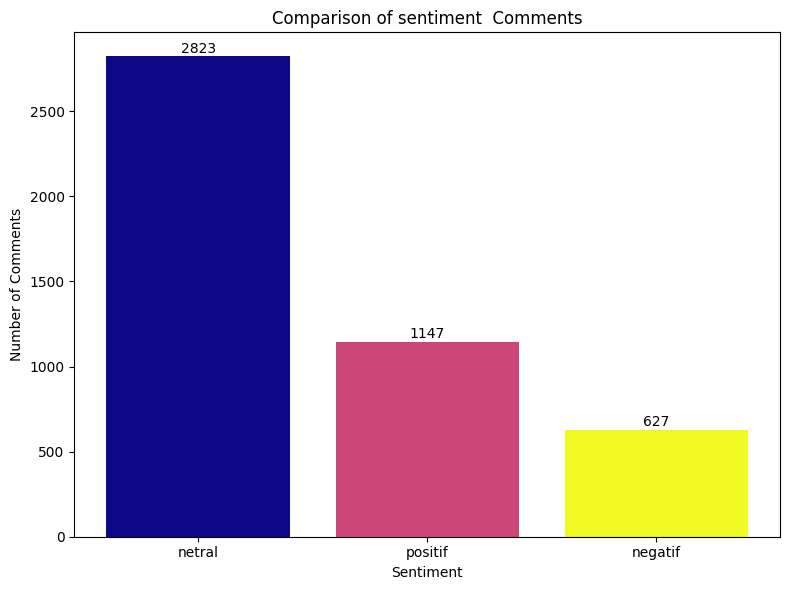

In [42]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Data for the bar chart
sentiment_counts = df['sentiment'].value_counts()
categories = sentiment_counts.index
counts = sentiment_counts.values

# Generate plasma colors based on number of categories
plasma_colors = cm.plasma(np.linspace(0, 1, len(categories)))

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts, color=plasma_colors)
plt.title('Comparison of sentiment  Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [43]:
print("Jumlah komentar Positif:", sentiment_counts.get("positif", 0))
print("Jumlah komentar Negatif:", sentiment_counts.get("negatif", 0))
print("Jumlah komentar Netral:", sentiment_counts.get("netral", 0))

Jumlah komentar Positif: 1147
Jumlah komentar Negatif: 627
Jumlah komentar Netral: 2823


In [44]:
# Mapping label string ke angka: negatif = 0, netral = 1, positif = 2
label_map = {"negatif": 0, "netral": 1, "positif": 2}

# Terapkan mapping ke kolom sentiment
df["label"] = df["sentiment"].map(label_map)

# Pastikan tidak ada NaN setelah mapping
df = df.dropna(subset=["label"])

# Ambil label sebagai array
y = df["label"].astype(int).values


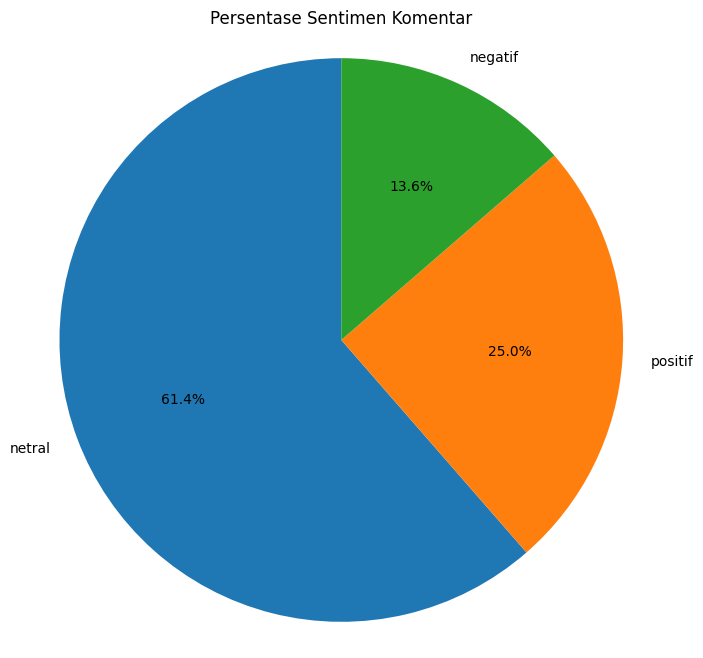

In [45]:
# Menghitung jumlah sentimen
sentiment_counts = df['sentiment'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Sentimen Komentar')
plt.axis('equal')
plt.show()

##Wordcloud

In [46]:
#kata - kata yang sering muncul
!pip install wordcloud

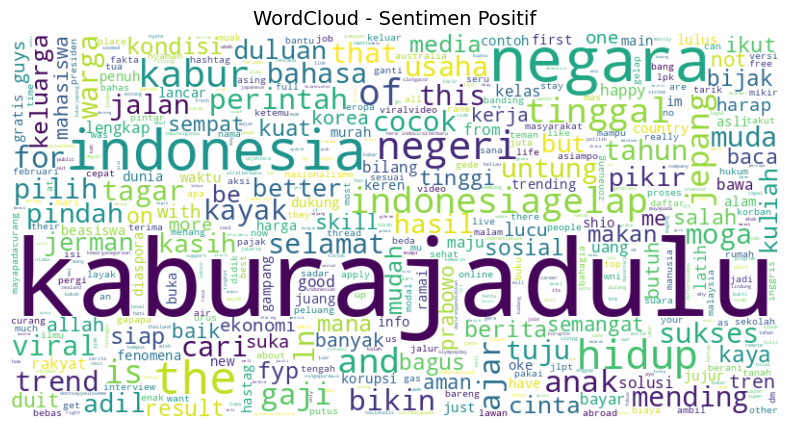

In [53]:
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Pastikan kolom 'stemming' dalam bentuk list, bukan string
def safe_eval(val):
    if isinstance(val, list):
        return val
    try:
        return ast.literal_eval(val)  # ubah dari string ke list
    except:
        return []

# Terapkan evaluasi aman
df['stemming'] = df['stemming'].apply(safe_eval)

# Fungsi untuk membuat WordCloud
def generate_wordcloud(tokens_list, title):
    all_tokens = [token for tokens in tokens_list for token in tokens]
    word_freq = Counter(all_tokens)
    wordcloud = WordCloud(width=800, height=400, max_font_size=200, max_words=500,
                          background_color='white', colormap='viridis',
                          collocations=False, repeat=False
                          ).generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# WordCloud untuk sentimen positif
positive_tokens = df[df['sentiment'] == 'positif']['stemming']
generate_wordcloud(positive_tokens, "WordCloud - Sentimen Positif")


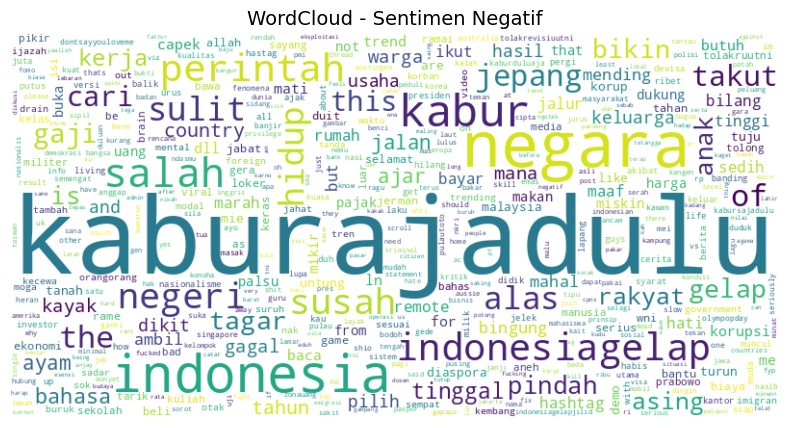

In [54]:
# WordCloud untuk sentimen negatif
negative_tokens = df[df['sentiment'] == 'negatif']['stemming']
generate_wordcloud(negative_tokens, "WordCloud - Sentimen Negatif")

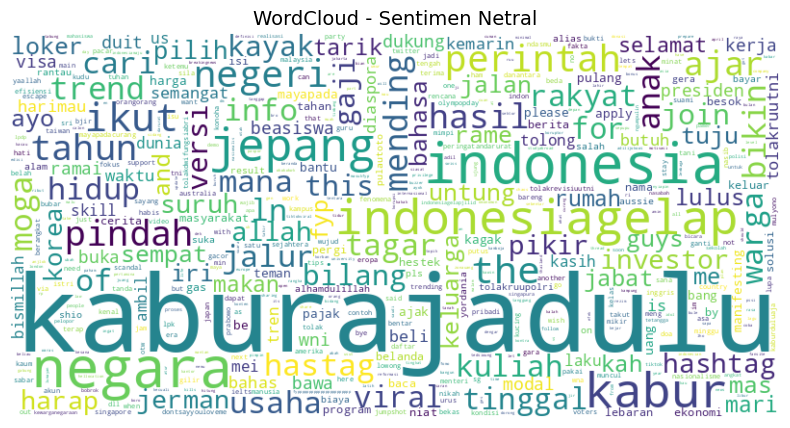

In [55]:
# WordCloud untuk sentimen netral
neutral_tokens = df[df['sentiment'] == 'netral']['stemming']
generate_wordcloud(neutral_tokens, "WordCloud - Sentimen Netral")

In [50]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/#KaburAjaDulu/hasil_sentimen", index=False)

In [51]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/#KaburAjaDulu/hasil_sentimen")

# Display 5 rows of data
display(df.head(15))

,full_text,clean_text,tokens,stopword,remove_slang,stemming,stemming_sentence,translated_en,sentiment,polarity_score,label
0,Udah ngerasain #KaburAjaDulu trus balik bentar...,udah ngerasain kaburajadulu trus balik bentar ...,"['udah', 'ngerasain', 'kaburajadulu', 'trus', ...","['ngerasain', 'kaburajadulu', 'trus', 'bentar'...","['kaburajadulu', 'bentar', 'bersyukur', 'sekar...","['kaburajadulu', 'bentar', 'syukur', 'sekarat'...",kaburajadulu bentar syukur sekarat ujung wafat...,kaburajadulu wait a minute dying the end of th...,negatif,-0.5,0
1,https://t.co/mC0g1FJSgk Sambil grinding buat p...,sambil grinding buat persiapan kaburajadulu al...,"['sambil', 'grinding', 'buat', 'persiapan', 'k...","['grinding', 'persiapan', 'kaburajadulu', 'all...","['grinding', 'persiapan', 'kaburajadulu', 'all...","['grinding', 'siap', 'kaburajadulu', 'all', 't...",grinding siap kaburajadulu all the best for al...,grinding siap kaburajadulu all the best for al...,positif,1.0,2
2,Apakah di sini ada yang butuh info apply visa ...,apakah di sini ada yang butuh info apply visa ...,"['apakah', 'di', 'sini', 'ada', 'yang', 'butuh...","['butuh', 'info', 'apply', 'visa', 'kaburajadu...","['butuh', 'info', 'apply', 'visa', 'kaburajadu...","['butuh', 'info', 'apply', 'visa', 'kaburajadu...",butuh info apply visa kaburajadulu kanada us e...,need info apply visa kaburajadulu canada us eu...,netral,0.0,1
3,@twisterfruity Search hashtag #kaburajadulu,search hashtag kaburajadulu,"['search', 'hashtag', 'kaburajadulu']","['search', 'hashtag', 'kaburajadulu']","['search', 'hashtag', 'kaburajadulu']","['search', 'hashtag', 'kaburajadulu']",search hashtag kaburajadulu,search hashtag kaburajadulu,netral,0.0,1
4,@cattominyg @tanyakanrl biar bisa make hastag ...,biar bisa make hastag kaburajadulu,"['biar', 'bisa', 'make', 'hastag', 'kaburajadu...","['make', 'hastag', 'kaburajadulu']","['hastag', 'kaburajadulu']","['hastag', 'kaburajadulu']",hastag kaburajadulu,hastag kaburajadulu,netral,0.0,1
5,Yuk #kaburajadulu ke US...,yuk kaburajadulu ke us,"['yuk', 'kaburajadulu', 'ke', 'us']","['kaburajadulu', 'us']","['kaburajadulu', 'us']","['kaburajadulu', 'us']",kaburajadulu us,__kabujaradulu__ us,netral,0.0,1
6,Lebih baik hati-hati sama narasi #KaburAjaDulu...,lebih baik hatihati sama narasi kaburajadulu t...,"['lebih', 'baik', 'hatihati', 'sama', 'narasi'...","['hatihati', 'narasi', 'kaburajadulu', 'teliti...","['hatihati', 'narasi', 'kaburajadulu', 'teliti...","['hatihati', 'narasi', 'kaburajadulu', 'teliti...",hatihati narasi kaburajadulu teliti baikbaik s...,hatihati narrative kaburajadulu careful good g...,positif,0.2,2
7,@hader4ch #KaburAjaDulu kak,kaburajadulu kak,"['kaburajadulu', 'kak']",['kaburajadulu'],['kaburajadulu'],['kaburajadulu'],kaburajadulu,__kabujadulu__,netral,0.0,1
8,@tanganjojo #kaburajadulu,kaburajadulu,['kaburajadulu'],['kaburajadulu'],['kaburajadulu'],['kaburajadulu'],kaburajadulu,__kabujadulu__,netral,0.0,1
9,save dulu aja siapa tau ada rezekinya bisa #ka...,save dulu aja siapa tau ada rezekinya bisa kab...,"['save', 'dulu', 'aja', 'siapa', 'tau', 'ada',...","['save', 'rezekinya', 'kaburajadulu']","['save', 'rezekinya', 'kaburajadulu']","['save', 'rezeki', 'kaburajadulu']",save rezeki kaburajadulu,save sustenance kaburajadulu,netral,0.0,1
